In [1136]:
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba

In [1137]:
def map(value, min, max):
        return (value/np.max(value)) * (max - min)


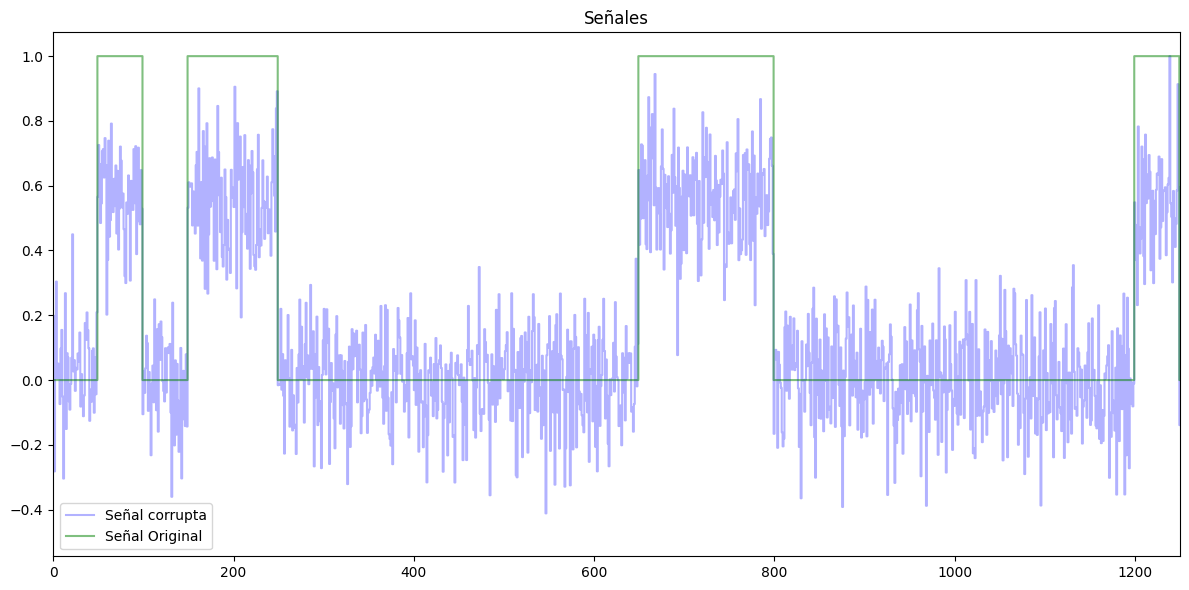

In [1138]:
a1 = 1       # Valor del símbolo a1
a0 = 0    # Valor del símbolo a0
Nsamples = 50 # Muestras de tiempo por símbolo
# Probabilidades de los símbolos
p_0 = 0.8
p_1 = 1 - p_0

amp_noise = 0.25

Nsymbols = 100 # Número total de símbolos
N = Nsymbols * Nsamples  # Número total de muestras

time = np.linspace(0, N, N)

# Genera una secuencia de símbolos basados en las probabilidades dadas
data = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])

# Repite cada símbolo según el número de muestras por símbolo
data = np.concatenate([[v]*Nsamples for v in data])
message_org = data  # Almacena la secuencia completa en la variable 'message'

o2 = 1

noise = np.random.normal(0, o2, N)

message_corrupt  = message_org + noise*amp_noise


message_corrupt = message_corrupt.reshape(-1, 1)  # Redimensionar para que cada muestra sea un vector de entrada
message_org = message_org.reshape(-1, 1)   

message_corrupt = map(message_corrupt, 0, 1)
message_org = map(message_org, 0, 1)


plt.figure(figsize=(12,6),tight_layout=True)  #modificar el tamaño (x,y)
plt.step(time,message_corrupt, '-b', label='Señal corrupta', alpha=0.3)
plt.step(time,message_org, '-g',label='Señal Original', alpha = 0.5)
#plt.step(time,y_pred_test, '-r',label='Señal Recuperada', alpha=0.3)
plt.xlim(0,int(N/4))
plt.title(f'Señales')
plt.legend()
plt.show()

In [1139]:
print(message_corrupt.shape[0])

5000


In [1140]:

entrada = tf.keras.layers.Dense(units=5, input_shape=[1])
capa1 = tf.keras.layers.Dense(units=20, activation='relu')
capa2 = tf.keras.layers.Dense(units=20, activation='relu')
capa3 = tf.keras.layers.Dense(units=20, activation='relu')
salida = tf.keras.layers.Dense(units=2, activation='sigmoid')
modelo = tf.keras.Sequential([entrada, capa1, capa2,capa3, salida])

# Compilación del modelo
modelo.compile(optimizer='adam', 
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy']
              )

historial=modelo.fit(message_corrupt, message_org, epochs=10)

# Evaluación del modelo
#loss, accuracy = modelo.evaluate(X_test, y_test)

#print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Predecir y evaluar los resultados
y_pred_test = modelo.predict(message_corrupt)




Epoch 1/10
157/157 [==============================] - 4s 6ms/step - loss: 0.3068 - accuracy: 0.9608
Epoch 2/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0483 - accuracy: 0.9828
Epoch 3/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0453 - accuracy: 0.9846
Epoch 4/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0452 - accuracy: 0.9836
Epoch 5/10
157/157 [==============================] - 1s 4ms/step - loss: 0.0452 - accuracy: 0.9848
Epoch 6/10
157/157 [==============================] - 1s 4ms/step - loss: 0.0446 - accuracy: 0.9840
Epoch 7/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0468 - accuracy: 0.9834
Epoch 8/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0465 - accuracy: 0.9834
Epoch 9/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0453 - accuracy: 0.9836
Epoch 10/10
157/157 [==============================] - 1s 3ms/step


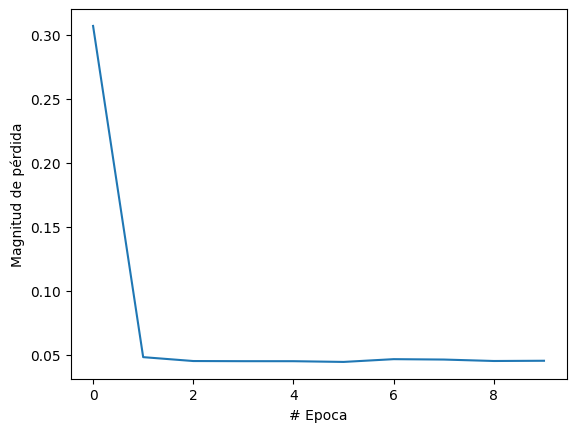

In [1141]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

157/157 [==============================] - 1s 5ms/step
[0.993662   0.03592981]
Original: 0 - Reconstruida: [0.993662   0.03592981]


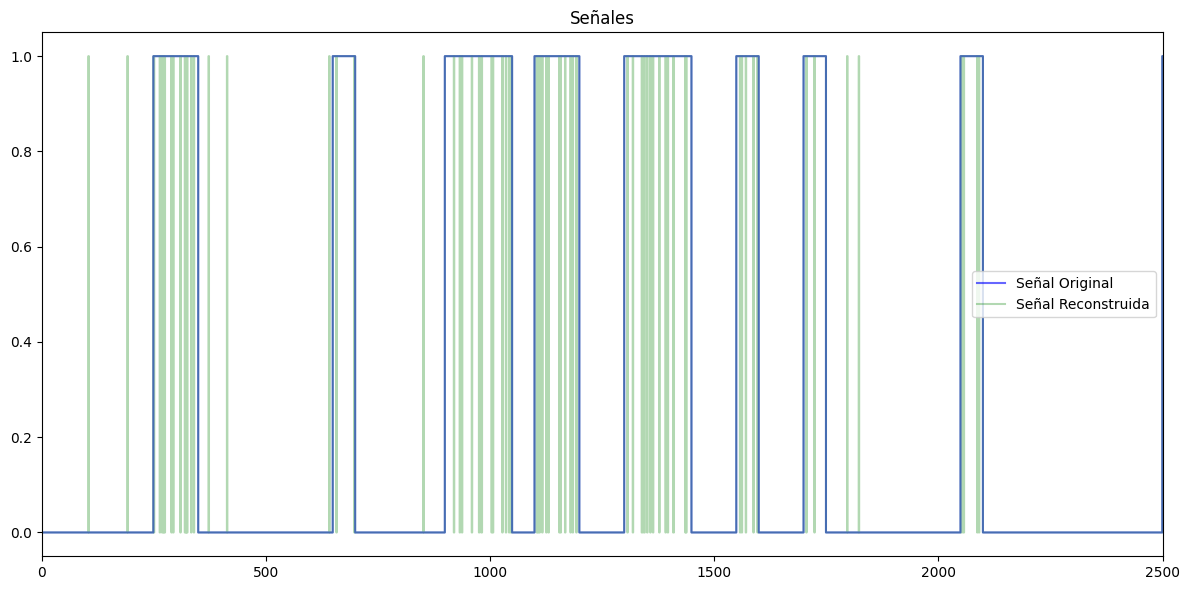

In [1142]:
data_test = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])
data_test = np.concatenate([[v]*Nsamples for v in data_test])


message_test = data_test
noise_test = np.random.normal(0, o2, N)
message_corrupt_test  = message_test + noise_test*amp_noise
message_corrupt_test = message_corrupt_test.reshape(-1, 1)  # Redimensionar para que cada muestra sea un vector de entrada

message_corrupt_test = map(message_corrupt_test,0,1)

message_predict = modelo.predict(message_corrupt_test)
#message_predict_ = message_predict.reshape(1, -1)[0]

print(message_predict[0])

#print(max(message_predict_))

for i in range(0,100,100):
    print(f"Original: {message_test[i]} - Reconstruida: {message_predict[i]}")

# Predecir y aplicar umbral

values = [0,1]
message_predict = [values[np.argmax(dato)] for dato in message_predict]

plt.figure(figsize=(12,6),tight_layout=True)  #modificar el tamaño (x,y)
plt.step(time,message_test, '-b', label='Señal Original', alpha=0.6)
plt.step(time,message_predict, '-g',label='Señal Reconstruida', alpha=0.3)
#plt.step(time,message_corrupt, alpha=0.1)
plt.xlim(0,int(N/2))
plt.title(f'Señales')
plt.legend()
plt.show()



(array([3905.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1095.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

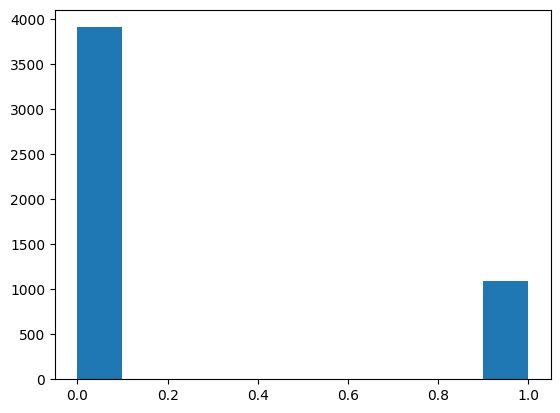

In [1143]:
plt.hist(message_predict)

In [1144]:
values = [0,1]

data = [[0,0.4], [0.2,0.1]]
data = np.array(data)

print([values[np.argmin(x)] for x in data])


[0, 1]


In [1145]:
import numpy as np
import tensorflow as tf

a1 = 1
a0 = 0
Nsamples = 10
p_0 = 0.9
p_1 = 1 - p_0
Nsymbols = 100
N = Nsymbols * Nsamples
time = np.linspace(0, N, N)
data = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])
data = np.repeat(data, Nsamples)  # Modo alternativo de repetir los símbolos
message_org = data

o2 = 1
noise = np.random.normal(0, o2, N)
message_corrupt = message_org + noise * 0.05
message_corrupt = message_corrupt.reshape(-1, 1)
message_org = message_org.reshape(-1, 1)

# Creación del modelo
entrada = tf.keras.layers.Input(shape=[1])
capa1 = tf.keras.layers.Dense(units=10, activation='relu')(entrada)
capa2 = tf.keras.layers.Dense(units=10, activation='relu')(capa1)
capa3 = tf.keras.layers.Dense(units=10, activation='relu')(capa2)
salida = tf.keras.layers.Dense(units=1, activation='sigmoid')(capa3)
modelo = tf.keras.Model(inputs=entrada, outputs=salida)

# Compilación del modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# División de datos en entrenamiento y validación
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(message_corrupt, message_org, test_size=0.2, random_state=42)

# Entrenamiento del modelo
historial = modelo.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=10
)

# Visualización de la pérdida


Epoch 1/10
25/25 [==============================] - 2s 19ms/step - loss: 0.6629 - accuracy: 0.9750 - val_loss: 0.6295 - val_accuracy: 1.0000
Epoch 2/10
25/25 [==============================] - 0s 11ms/step - loss: 0.5930 - accuracy: 1.0000 - val_loss: 0.5505 - val_accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 0s 15ms/step - loss: 0.5045 - accuracy: 1.0000 - val_loss: 0.4535 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 0s 10ms/step - loss: 0.4004 - accuracy: 1.0000 - val_loss: 0.3449 - val_accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 0s 7ms/step - loss: 0.2914 - accuracy: 1.0000 - val_loss: 0.2395 - val_accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 0.1949 - accuracy: 1.0000 - val_loss: 0.1550 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 0.1238 - accuracy: 1.0000 - val_loss: 0.0975 - val_accuracy: 1.0000
Epoch 8/10
25/25

32/32 [==============================] - 0s 4ms/step
0.9478728
Original: 0 - Reconstruida: [0.04108306]


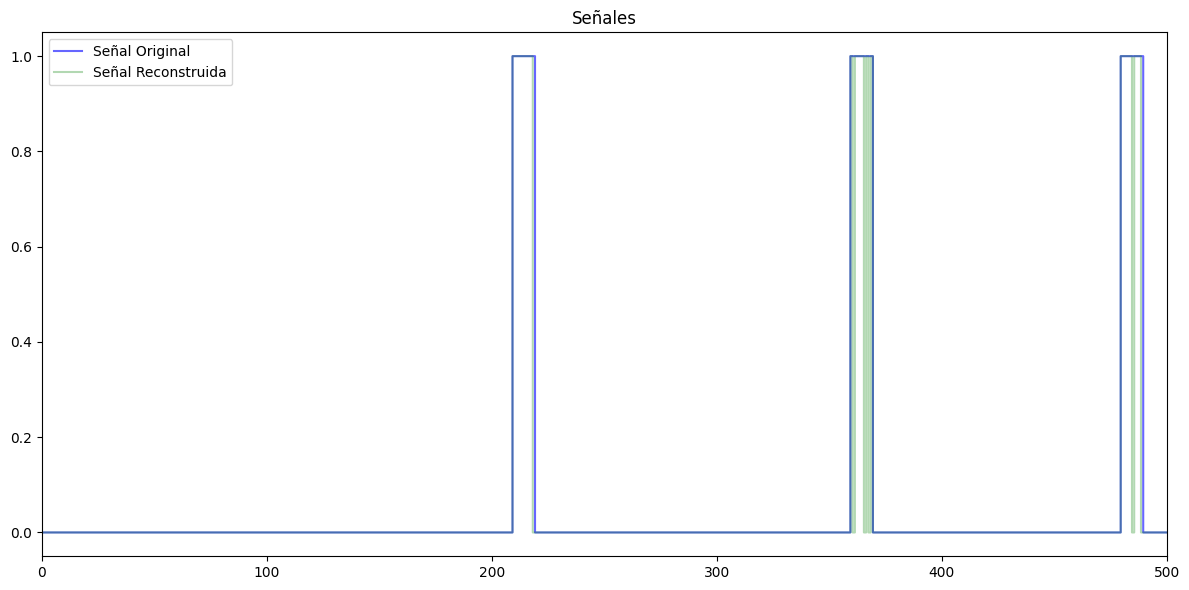

In [1146]:
data_test = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])
data_test = np.concatenate([[v]*Nsamples for v in data_test])


message_test = data_test
noise_test = np.random.normal(0, o2, N)
message_corrupt_test  = message_test + noise_test*amp_noise
message_corrupt_test = message_corrupt_test.reshape(-1, 1)  # Redimensionar para que cada muestra sea un vector de entrada

message_corrupt_test = map(message_corrupt_test,0,1)

message_predict = modelo.predict(message_corrupt_test)
message_predict_ = message_predict.reshape(1, -1)[0]



print(max(message_predict_))

for i in range(0,100,100):
    print(f"Original: {message_test[i]} - Reconstruida: {message_predict[i]}")

# Predecir y aplicar umbral

#values = [1,0]
#message_predict = [values[np.argmax(dato)] for dato in message_predict]




#message_predict_ = (message_predict > 0.01).astype(int)
umbral = 0.5
#print(max(message_predict_))

message_predict = [1 if value >= umbral else 0 for value in message_predict_]
#message_predict=message_predict_

plt.figure(figsize=(12,6),tight_layout=True)  #modificar el tamaño (x,y)
plt.step(time,message_test, '-b', label='Señal Original', alpha=0.6)
plt.step(time,message_predict, '-g',label='Señal Reconstruida', alpha=0.3)
#plt.step(time,message_corrupt, alpha=0.1)
plt.xlim(0,int(N/2))
plt.title(f'Señales')
plt.legend()
plt.show()